In [2]:
import re
import matplotlib.pyplot as plt
import pandas as pd

def get_train_acc(log_file):
    train_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('rain_acc \d+.\d+', line)
        if match:
            train_acc = match[0].split(' ')[1]
            train_acc_list.append(float(train_acc))
        
    return train_acc_list

def get_valid_acc(log_file):
    valid_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('alid_acc.? \d+.\d+', line)
        if match:
            valid_acc = match[0].split(' ')[1]
            valid_acc_list.append(float(valid_acc))
        
    return valid_acc_list

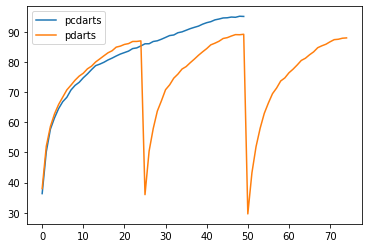

In [27]:
pcdarts_search = get_train_acc('./PC-DARTS/begin_unroll/log.txt')
pdarts_search = get_train_acc('./PDARTS/begin_unroll/log.txt')

plt.plot(pcdarts_search, label='pcdarts')
plt.plot(pdarts_search, label='pdarts')

plt.legend()

96.66

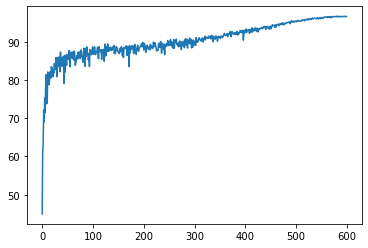

In [32]:
pdarts_train = get_valid_acc('./PDARTS/begin/log.txt')
plt.plot(pdarts_train, label='pdarts')
max(pdarts_train)

96.27

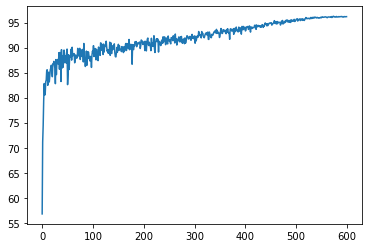

In [33]:
pcdarts_train = get_valid_acc('./PC-DARTS/begin/log.txt')
plt.plot(pcdarts_train, label='pcdarts')
max(pcdarts_train)

In [34]:
geno_file = 'PDARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PDARTS',
  {'skip_connect': 2,
   'dil_conv_3x3': 3,
   'sep_conv_3x3': 5,
   'dil_conv_5x5': 3,
   'avg_pool_3x3': 1,
   'sep_conv_5x5': 1,
   'max_pool_3x3': 1}),
 ('begin_unroll',
  {'sep_conv_3x3': 7,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 3,
   'skip_connect': 2,
   'avg_pool_3x3': 1,
   'sep_conv_5x5': 2})]

In [35]:
geno_file = 'PC-DARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PC_DARTS_cifar',
  {'sep_conv_3x3': 7,
   'skip_connect': 1,
   'dil_conv_3x3': 2,
   'sep_conv_5x5': 4,
   'avg_pool_3x3': 1,
   'max_pool_3x3': 1}),
 ('PC_DARTS_image',
  {'skip_connect': 3,
   'sep_conv_3x3': 9,
   'dil_conv_5x5': 2,
   'max_pool_3x3': 1,
   'sep_conv_5x5': 1}),
 ('begin_unroll',
  {'skip_connect': 3,
   'sep_conv_3x3': 7,
   'max_pool_3x3': 2,
   'dil_conv_5x5': 2,
   'sep_conv_5x5': 2})]

In [6]:
geno_file = "/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_original/log.txt"
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('2020-10-30 13:36:11,678 genotype',
  {'max_pool_3x3': 2,
   'dil_conv_3x3': 4,
   'avg_pool_3x3': 5,
   'sep_conv_3x3': 2,
   'sep_conv_5x5': 1,
   'skip_connect': 1,
   'dil_conv_5x5': 1}),
 ('2020-10-30 14:00:23,310 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 14:25:14,115 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 14:49:29,349 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 15:14:36,230 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 15:39:34,589 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:04:23,599 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:29:08,769 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:54:01,333 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('202

In [56]:
def plot_epoch_geno(geno_file, title=''):
    geno = open(geno_file, 'r')

    genotypes = []
    for line in geno.readlines():
        match = re.findall('.* = Genotype\(normal=.*\)', line)
        if match:
            arch = match[0].split(' = ')
            arch_name, arch_type = arch[0], arch[1]
            arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
            arch_type = {e:arch_type.count(e) for e in arch_type}
            genotypes.append((arch_name, arch_type))
            
    data = []
    for t, d in genotypes:
        data.append(d)

    df = pd.DataFrame(data=data)
    df = df.fillna(0)

    plt.figure(figsize=(10,4))
    plt.plot(df)
    plt.legend(df.columns)
    plt.ylabel('number of connection type')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

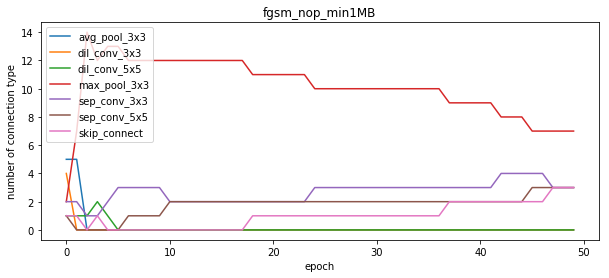

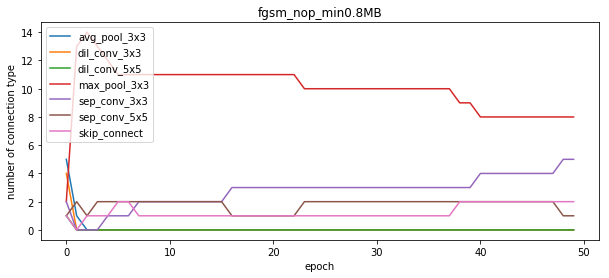

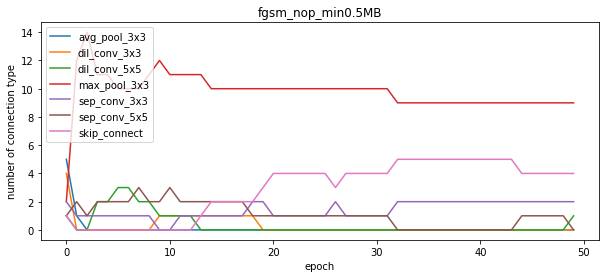

In [57]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min/log.txt", 'fgsm_nop_min1MB')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min8e5/log.txt", 'fgsm_nop_min0.8MB')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min5e5/log.txt", 'fgsm_nop_min0.5MB')

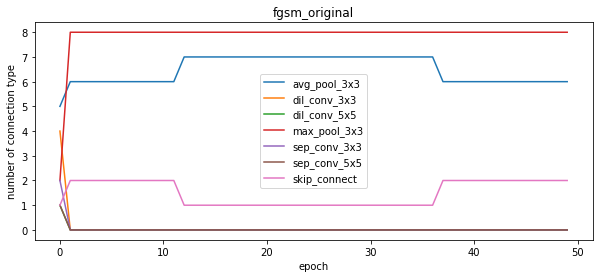

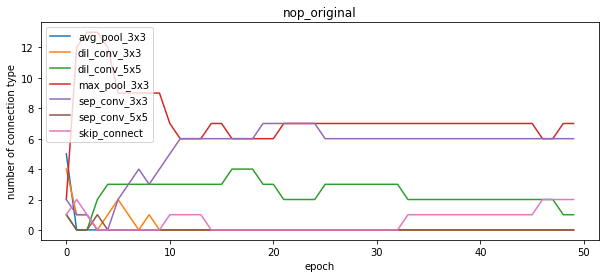

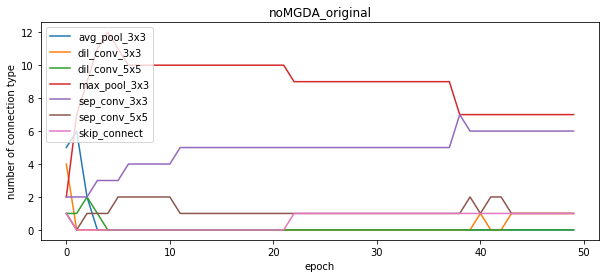

In [58]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_original/log.txt", 'fgsm_original')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/nop_original/log.txt", 'nop_original')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/noMGDA_original/log.txt", 'noMGDA_original')

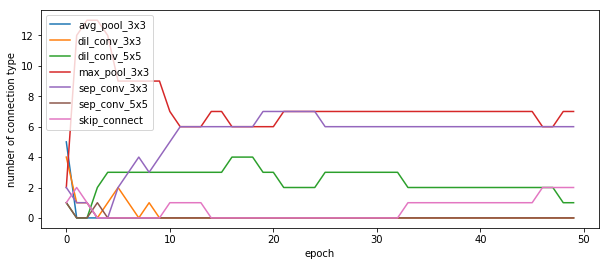

In [60]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/nop_original/log.txt")